In [1]:
import random
import numpy as np
import pandas as pd
import time
import matplotlib as plt

def pick_weekly_topic():
    topics = np.random.choice( 350, 6, replace=False ).tolist() 
    #generate 6 random topics
    #first 5 are the user's topics, last one is the random one
    if topics[ -1 ] * 2 <= ( 350 * 2 * .05 ): 
        return topics[ -1 ]
    else:
        return topics[ -2 ]
    
def iter_topics( topics ):
    wt = pick_weekly_topic()
    topics = topics[ 1: ] + [ wt ]
    return topics

def instantiate_topics( topics = [] ):
    for i in range( 3 ):
        topics.append( pick_weekly_topic() )
    return topics

topics = instantiate_topics( )
topics_permutations_counts = {}
topics_permutations = {}
topics_permutations[ tuple( topics ) ] = 1
#time stuff
start_time = time.time()
last_run = start_time

for j in range( 1000 ):
    if j % 100 == 0:
        print( j )
        print( "--- %s seconds ---" % (time.time() - last_run ) )
        last_run = time.time()
    for i in range( 1000000 ):
        topics = iter_topics( topics )
        if tuple( topics ) not in topics_permutations:
            topics_permutations[ tuple( topics ) ] = 1
        else:
            topics_permutations[ tuple( topics ) ] += 1

    if len( topics_permutations ) not in topics_permutations_counts:
        topics_permutations_counts[ len( topics_permutations ) ] = 1
    else:
        topics_permutations_counts[ len( topics_permutations ) ] += 1

0
--- 0.00015783309936523438 seconds ---
100
--- 888.3816862106323 seconds ---
200
--- 916.8821280002594 seconds ---
300
--- 922.1743900775909 seconds ---
400
--- 924.6670928001404 seconds ---
500
--- 921.1196439266205 seconds ---
600
--- 10194.193534135818 seconds ---
700
--- 910.0831980705261 seconds ---
800
--- 15146.567686080933 seconds ---
900
--- 928.9590678215027 seconds ---


array([[<AxesSubplot:title={'center':'permutations'}>]], dtype=object)

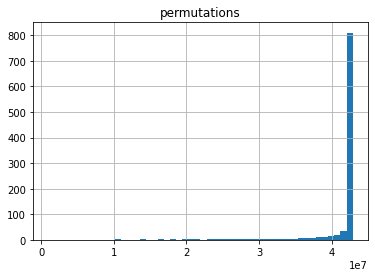

In [20]:
import matplotlib as plt
#perms = [ key for key, value in topics_permutations_counts.items() ]
perms = [ perm for perm_sublist in [ [ key ] * value for key, value in topics_permutations_counts.items() ] for perm in perm_sublist ]
perms = pd.DataFrame( perms, columns=['permutations'] )
perms.hist(bins=50)

In [18]:
perms = [ perm for perm_sublist in [ [ key ] * value for key, value in topics_permutations_counts.items() ] for perm in perm_sublist ]
print( perms )

[986655, 1947298, 2882424, 3793311, 4681030, 5545775, 6388070, 7209493, 8010068, 8791360, 9552818, 10295315, 11019237, 11725080, 12413270, 13084249, 13739832, 14378265, 15001598, 15610206, 16204672, 16785134, 17350614, 17904310, 18444665, 18972067, 19486434, 19989482, 20481283, 20961047, 21429546, 21887851, 22335578, 22772312, 23200165, 23616899, 24024796, 24423966, 24813796, 25195144, 25568348, 25931689, 26287924, 26635796, 26974973, 27308325, 27633864, 27952148, 28263893, 28568923, 28866939, 29157459, 29442015, 29720493, 29993829, 30260638, 30521551, 30777038, 31026619, 31271381, 31510130, 31743588, 31972806, 32196495, 32415709, 32630680, 32841551, 33047802, 33249168, 33446562, 33640361, 33829067, 34013884, 34194797, 34371566, 34545140, 34714877, 34880638, 35043598, 35203126, 35358228, 35510727, 35660304, 35806647, 35949705, 36090480, 36227524, 36362157, 36493764, 36622368, 36748980, 36872648, 36993556, 37111894, 37228734, 37342360, 37453746, 37563244, 37670006, 37774757, 37877557, 3